<a href="https://colab.research.google.com/github/ElisabethShah/DS-Unit-2-Linear-Models/blob/master/module4-logistic-regression/Logistic%20Regression%20Assignment%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression: Water Pumps in Tanzania

#### Objectives
- begin with baselines for classification
- use classification metric: accuracy
- do train/validate/test split
- use scikit-learn for logistic regression
- submit to predictive modeling competitions

## Install and import libraries

In [1]:
!pip install -U pandas-profiling

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 614kB 8.8MB/s 
     |████████████████████████████████| 225kB 41.0MB/s 
     |████████████████████████████████| 768kB 37.2MB/s 
     |████████████████████████████████| 51kB 21.2MB/s 
     |████████████████████████████████| 194kB 44.7MB/s 
     |████████████████████████████████| 737kB 33.6MB/s 
     |████████████████████████████████| 51kB 19.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/c7/c6/58/3a7be8f84fbe64a88f8c3e5cf0360e5abfbdc321d3d421df21
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /root/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:

In [2]:
!pip install category_encoders

     |████████████████████████████████| 92kB 3.5MB/s 


In [0]:
import category_encoders as ce
import numpy as np
import pandas as pd
import pandas_profiling

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Import data

In [0]:
LOCAL = '../data/tanzania/'
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/tanzania/'

train_features = pd.read_csv(WEB + 'train_features.csv')
train_labels = pd.read_csv(WEB + 'train_labels.csv')
test_features = pd.read_csv(WEB + 'test_features.csv')
sample_submission = pd.read_csv(WEB + 'sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

## Do train/validate/test split

In [0]:
X_train, X_val, y_train, y_val = train_test_split(train_features, 
                                                  train_labels['status_group'], 
                                                  random_state=0)

## Begin with baselines for classification

### Majority classifier

#### Determine majority class

In [6]:
y_train.value_counts()

functional                 24237
non functional             17107
functional needs repair     3206
Name: status_group, dtype: int64

In [19]:
y_train.value_counts(normalize=True)

functional                 0.544040
non functional             0.383996
functional needs repair    0.071964
Name: status_group, dtype: float64

#### Make predictions

In [0]:
majority_pred = np.full_like(y_train, fill_value = y_train.mode())# [y_train.mode()[0]] * len(X_val)

#### Evaluate accuracy

In [8]:
accuracy_score(y_val, majority_pred)

0.5402020202020202

### Logistic regression on numeric features

#### Drop non-numeric features

In [9]:
X_train_numeric = X_train.select_dtypes(include='number')
X_train_numeric.describe()

id     amount_tsh  ...    population  construction_year
count  44550.000000   44550.000000  ...  44550.000000       44550.000000
mean   37103.372233     303.402168  ...    180.715668        1302.222402
std    21480.513251    2499.313136  ...    475.340117         951.089474
min        0.000000       0.000000  ...      0.000000           0.000000
25%    18397.000000       0.000000  ...      0.000000           0.000000
50%    37104.500000       0.000000  ...     30.000000        1986.000000
75%    55684.750000      20.000000  ...    215.000000        2004.000000
max    74247.000000  250000.000000  ...  30500.000000        2013.000000

[8 rows x 10 columns]

In [10]:
X_train_numeric = X_train_numeric[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year']]
X_train_numeric.describe()

amount_tsh    gps_height  ...    population  construction_year
count   44550.000000  44550.000000  ...  44550.000000       44550.000000
mean      303.402168    668.239394  ...    180.715668        1302.222402
std      2499.313136    692.372863  ...    475.340117         951.089474
min         0.000000    -90.000000  ...      0.000000           0.000000
25%         0.000000      0.000000  ...      0.000000           0.000000
50%         0.000000    371.000000  ...     30.000000        1986.000000
75%        20.000000   1319.000000  ...    215.000000        2004.000000
max    250000.000000   2770.000000  ...  30500.000000        2013.000000

[8 rows x 7 columns]

#### Drop nulls if necessary.

In [11]:
X_train_numeric.isnull().sum()

amount_tsh           0
gps_height           0
longitude            0
latitude             0
num_private          0
population           0
construction_year    0
dtype: int64

In [12]:
X_train_numeric.profile_report()

#### Fit logistic regression to (numeric) training data

In [13]:
model = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter=10000)
model.fit(X_train_numeric, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluate predictions on validation data

In [14]:
y_pred = model.predict(X_val[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'population', 'construction_year']])

accuracy_score(y_val, y_pred)

0.5487542087542088

In [15]:
pd.Series(y_pred).value_counts()

functional        13261
non functional     1589
dtype: int64

## Explore and clean data

In [16]:
X_train.profile_report()

In [0]:
X_train['date_recorded'] = pd.to_datetime(X_train['date_recorded'], infer_datetime_format=True)

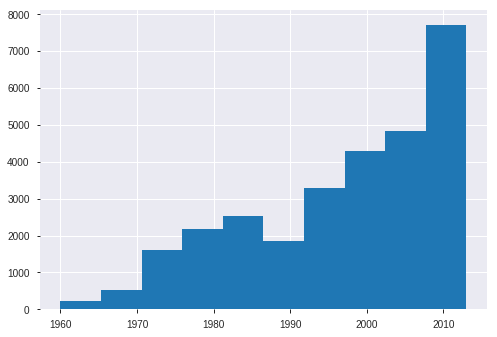

In [18]:
X_train['construction_year'][X_train['construction_year']!=0].hist();

In [22]:
X_train['construction_year'].value_counts().sort_index(ascending=False)

2013      135
2012      807
2011      940
2010     1978
2009     1893
2008     1966
2007     1178
2006     1055
2005      767
2004      867
2003      978
2002      818
2001      418
2000     1586
1999      746
1998      716
1997      469
1996      601
1995      769
1994      518
1993      457
1992      478
1991      247
1990      729
1989      243
1988      403
1987      226
1986      328
1985      709
1984      566
1983      364
1982      563
1981      180
1980      612
1979      144
1978      796
1977      144
1976      302
1975      329
1974      482
1973      134
1972      539
1971      116
1970      326
1969       47
1968       65
1967       70
1966       13
1965       17
1964       33
1963       65
1962       26
1961       19
1960       77
0       15496
Name: construction_year, dtype: int64

In [0]:
X_train['year_recorded'] = X_train['date_recorded'].dt.year

In [24]:
X_train['year_recorded'].value_counts().sort_index()

2002        1
2004       20
2011    21450
2012     4794
2013    18285
Name: year_recorded, dtype: int64

In [0]:
X_train['construction_year'] = X_train['construction_year'].replace(0, 2010)

In [41]:
condition = X_train['construction_year'].gt(X_train['year_recorded'])
X_train[['construction_year', 'year_recorded']][condition]

construction_year  year_recorded
8729                2008           2004
32775               2010           2004
58663               2010           2004
16468               2010           2004
48555               2008           2004
2601                2010           2002
55669               2010           2004
39559               2009           2004
32619               2005           2004
15103               2010           2004
8736                2010           2004
26086               2010           2004
13366               2011           2004
14697               2010           2004

In [0]:
X_train['construction_year'] = np.minimum(X_train['construction_year'], X_train['year_recorded'])

In [48]:
condition = X_train['construction_year'].gt(X_train['year_recorded'])
X_train[['construction_year', 'year_recorded']][condition]

Empty DataFrame
Columns: [construction_year, year_recorded]
Index: []